In [1]:
%load_ext lab_black

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from config import g_key
from config import mapbox_token

px.set_mapbox_access_token(mapbox_token)

In [3]:
df = pd.read_csv("Data/mrgdata_food.csv")
df = df.replace("-", str(0.0))
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_bp,StateAbbr_bp,StateDesc_bp,CityName_bp,GeographicLevel_bp,Category_bp,UniqueID_bp,Measure_bp,...,Total Male,Total Female,White Population,Black or African American Population,American Indian and Alaska Native Population,Asian Population,Native Hawaiian and Other Pacific Islander population,Some Other Race Population,GEO_ID,Number of Fast Food
0,0,0,2017,TX,Texas,Austin,Census Tract,Health Outcomes,4805000-48453000604,High blood pressure among adults aged >=18 Years,...,3755,3385,4976,304,76,1824,8,151,1400000,12
1,1,1,2017,TX,Texas,Austin,Census Tract,Health Outcomes,4805000-48453002113,High blood pressure among adults aged >=18 Years,...,1881,1727,2711,745,39,76,13,134,1400000,2
2,2,2,2017,TX,Texas,Austin,Census Tract,Health Outcomes,4805000-48453001718,High blood pressure among adults aged >=18 Years,...,3181,2995,5293,226,11,607,0,149,1400000,1
3,3,3,2017,TX,Texas,Austin,Census Tract,Health Outcomes,4805000-48453001908,High blood pressure among adults aged >=18 Years,...,4880,4703,8291,401,25,825,0,54,1400000,0
4,4,4,2017,TX,Texas,Austin,Census Tract,Health Outcomes,4805000-48453002212,High blood pressure among adults aged >=18 Years,...,514,529,469,499,23,0,0,115,1400000,0


In [4]:
df.dtypes

Unnamed: 0                                                int64
Unnamed: 0.1                                              int64
Year_bp                                                   int64
StateAbbr_bp                                             object
StateDesc_bp                                             object
                                                          ...  
Asian Population                                          int64
Native Hawaiian and Other Pacific Islander population     int64
Some Other Race Population                                int64
GEO_ID                                                    int64
Number of Fast Food                                       int64
Length: 164, dtype: object

In [5]:
new_df = df[
    [
        "Census Tract",
        "Lat_bp",
        "Lng_bp",
        "Total Households",
        "Income < $10,000",
        "Income $10,000-$14,999",
        "Income $15,000-$24,999",
        "Income $25,000-$34,999",
        "Income $35,000-$49,999",
        "Income $50,000-$74,999",
        "Income $75,000-$99,999",
        "Income $100,000-$149,999",
        "Income $150,000-$199,999",
        "Income > $200,000",
        "Median Income (dollars)",
        "Mean Income (dollars)",
        "Number of Fast Food",
    ]
].copy()

new_df.head()

,Census Tract,Lat_bp,Lng_bp,Total Households,"Income < $10,000","Income $10,000-$14,999","Income $15,000-$24,999","Income $25,000-$34,999","Income $35,000-$49,999","Income $50,000-$74,999","Income $75,000-$99,999","Income $100,000-$149,999","Income $150,000-$199,999","Income > $200,000",Median Income (dollars),Mean Income (dollars),Number of Fast Food
0,48453000604,30.285534,-97.747727,1616,54.5,13.1,16.5,0.7,4.4,5.9,0.6,2.9,0.6,0.9,8975,19236,12
1,48453002113,30.317043,-97.672532,1380,9.2,3.7,5.6,9.1,12.9,20.0,17.1,13.2,4.9,4.3,62198,74111,2
2,48453001718,30.348304,-97.761025,2914,2.9,4.4,3.3,6.8,14.3,16.8,11.2,18.1,6.8,15.5,77045,115912,1
3,48453001908,30.267362,-97.891753,3614,3.0,2.8,5.0,4.6,3.4,13.9,13.3,13.4,11.8,28.7,110833,172758,0
4,48453002212,30.310133,-97.591602,265,0.0,0.0,1.9,12.8,5.3,29.1,27.5,17.7,1.5,4.2,75368,81618,0


In [8]:
source_col_loc = new_df.columns.get_loc(
    "Income < $10,000"
)  # column position starts from 0

new_df["Income percent $10,000-$34,999"] = new_df.iloc[
    :, source_col_loc + 1 : source_col_loc + 4
].apply(lambda x: ",".join(x.astype(str)), axis=1)

new_df

,Census Tract,Lat_bp,Lng_bp,Total Households,"Income < $10,000","Income $10,000-$14,999","Income $15,000-$24,999","Income $25,000-$34,999","Income $35,000-$49,999","Income $50,000-$74,999","Income $75,000-$99,999","Income $100,000-$149,999","Income $150,000-$199,999","Income > $200,000",Median Income (dollars),Mean Income (dollars),Number of Fast Food,"Income percent $10,000-$34,999"
0,48453000604,30.285534,-97.747727,1616,54.5,13.1,16.5,0.7,4.4,5.9,0.6,2.9,0.6,0.9,8975,19236,12,"13.1,16.5,0.7"
1,48453002113,30.317043,-97.672532,1380,9.2,3.7,5.6,9.1,12.9,20.0,17.1,13.2,4.9,4.3,62198,74111,2,"3.7,5.6,9.1"
2,48453001718,30.348304,-97.761025,2914,2.9,4.4,3.3,6.8,14.3,16.8,11.2,18.1,6.8,15.5,77045,115912,1,"4.4,3.3,6.8"
3,48453001908,30.267362,-97.891753,3614,3.0,2.8,5.0,4.6,3.4,13.9,13.3,13.4,11.8,28.7,110833,172758,0,"2.8,5.0,4.6"
4,48453002212,30.310133,-97.591602,265,0.0,0.0,1.9,12.8,5.3,29.1,27.5,17.7,1.5,4.2,75368,81618,0,"0.0,1.9,12.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,48453002435,30.160227,-97.640604,2296,0.7,3.3,13.2,6.9,16.6,20.6,18.4,12.9,3.0,4.4,59835,71539,0,"3.3,13.2,6.9"
187,48453002429,30.167511,-97.773575,599,1.3,5.3,6.8,8.7,21.7,25.2,11.4,17.2,2.3,0.0,55317,60016,0,"5.3,6.8,8.7"
188,48453002426,30.154824,-97.752069,2869,3.3,0.7,1.1,5.9,12.3,20.9,27.2,20.6,2.0,5.9,78952,84546,0,"0.7,1.1,5.9"
189,48453002422,30.183438,-97.784816,2542,6.4,1.8,8.1,14.5,18.3,25.8,16.1,4.4,1.2,3.4,56078,61570,1,"1.8,8.1,14.5"


In [9]:
new_df_ascend = new_df.sort_values(by="Number of Fast Food", ascending=True)
pd.set_option("display.max_rows", 10)
new_df_ascend

,Census Tract,Lat_bp,Lng_bp,Total Households,"Income < $10,000","Income $10,000-$14,999","Income $15,000-$24,999","Income $25,000-$34,999","Income $35,000-$49,999","Income $50,000-$74,999","Income $75,000-$99,999","Income $100,000-$149,999","Income $150,000-$199,999","Income > $200,000",Median Income (dollars),Mean Income (dollars),Number of Fast Food,"Income percent $10,000-$34,999"
190,48453002433,30.191202,-97.617230,2230,4.3,1.4,14.0,6.6,14.2,23.2,10.4,14.7,7.6,3.6,54542,73888,0,"1.4,14.0,6.6"
82,48453001784,30.327517,-97.904352,2010,1.0,0.8,2.7,5.1,9.6,8.3,8.5,15.0,17.5,31.5,141071,183240,0,"0.8,2.7,5.1"
81,48453001770,30.189773,-97.890929,4063,0.5,1.5,0.3,1.8,3.9,7.7,10.6,26.4,19.5,27.8,143040,176237,0,"1.5,0.3,1.8"
166,48453002411,30.205288,-97.748878,1895,10.3,3.1,16.7,16.7,13.6,16.8,13.2,7.7,0.2,1.9,37813,51660,0,"3.1,16.7,16.7"
79,48453001839,30.404733,-97.658923,3325,2.5,1.6,6.0,5.6,13.7,29.1,14.8,20.1,4.2,2.4,68650,75740,0,"1.6,6.0,5.6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,48453000603,30.291992,-97.746270,2349,49.9,14.2,14.3,9.3,4.3,3.1,3.6,0.3,1.1,0.0,10035,17551,13,"14.2,14.3,9.3"
153,48453002105,30.314918,-97.705591,2103,6.5,6.7,17.6,12.6,19.1,14.5,9.6,9.2,3.7,0.7,37891,52534,13,"6.7,17.6,12.6"
91,48453002315,30.233924,-97.732136,1428,7.4,4.8,19.7,17.6,22.1,12.5,6.9,6.2,1.3,1.5,35216,46813,13,"4.8,19.7,17.6"
83,48453000601,30.287412,-97.738044,319,42.6,6.9,11.6,10.7,10.3,10.0,6.3,1.6,0.0,0.0,15938,27468,14,"6.9,11.6,10.7"


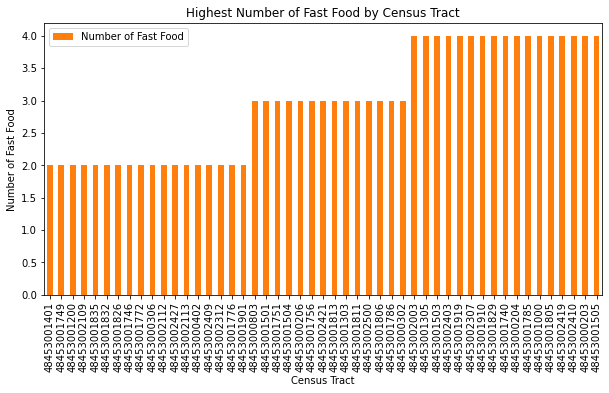

In [14]:
new_df_ascend.iloc[100:149].reset_index().plot(
    kind="bar",
    x="Census Tract",
    y="Number of Fast Food",
    title="Highest Number of Fast Food by Census Tract",
    figsize=(10, 5),
    color="tab:orange",
)
plt.xlabel("Census Tract")
plt.ylabel("Number of Fast Food")
plt.show()

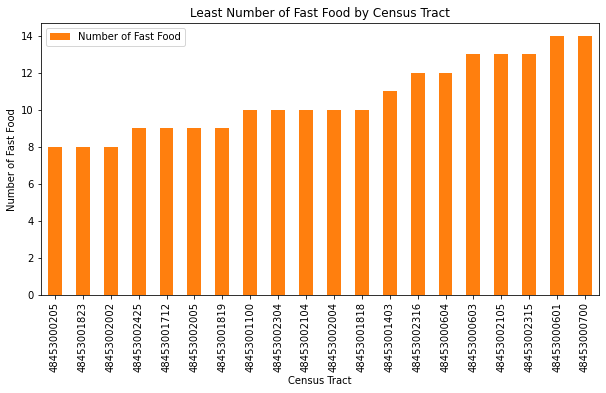

In [15]:
new_df_ascend.tail(20).reset_index().plot(
    kind="bar",
    x="Census Tract",
    y="Number of Fast Food",
    title="Least Number of Fast Food by Census Tract",
    figsize=(10, 5),
    color="tab:orange",
)
plt.xlabel("Census Tract")
plt.ylabel("Number of Fast Food")
plt.show()